In [214]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from numpy import trapz
from scipy.special import erf

lgrey = (0.92,0.92,0.92)
mgrey = (0.86,0.86,0.86)


In [128]:

def F(x,m1,m2,m3):
    F = np.exp( -(x-m1)**2 / (2*m2**2) )/np.sqrt(2*np.pi) * 0.5 * (1+erf(m3*(x-m1)/(m2*np.sqrt(2))))
    F[x==0] = 0
    F[x==1] = 0
    return F 


In [200]:
def g(x, a1, a2):
    x1 = a1
    x2 = max(a1,a2)
    
    j1 = x < x1
    j2 = np.logical_and(x >= x1, x < x2)
    j3 = x >= x2
    
    gx = np.zeros(x.shape)
    gx[j3] = 0.7 + (x[j3]-a2)*(1-0.7)/(1-a2)
    gx[j2] = 0.4 + (x[j2]-a1)*(0.7-0.4)/(a2-a1)
    gx[j1] = 0.4/a1 * x[j1]
    return gx

def ginv(y, a1, a2):
    y1 = 0.4
    y2 = max(0.7, 0.7 + (a1-a2)*0.3/(1-a2) )  
                        
    j1 = y < y1
    j2 = np.logical_and(y>=y1, y<y2)
    j3 = y >= y2
    
    gy = np.zeros(y.shape)
    gy[j3] = a2 + (y[j3]-0.7)*(1-a2)/(1-0.7)
    gy[j2] = min(a1,a2) + (y[j2]-0.4)*max(0,a2-a1)/(0.7-0.4)
    gy[j1] = a1/0.4 * y[j1]
    return gy

def ginv0(y, a1, a2):
    j1 = y < 0.4
    j2 = np.logical_and(y>=0.4, y<0.7)
    j3 = y >= 0.7
    
    gy = np.zeros(y.shape)
    
    gy[j3] = a2 + (y[j3]-0.7)*(1-a2)/(1-0.7)
    gy[j2] = a1 + (y[j2]-0.4)*(a2-a1)/(0.7-0.4)
    gy[j1] = a1/0.4 * y[j1]
    return gy

In [201]:
def dxdy(y, a1, a2):
    y1 = 0.4
    y2 = max(0.7, 0.7 + (a1-a2)*0.3/(1-a2) )  
  
    j1 = y < y1
    j2 = np.logical_and(y>=y1, y<y2)
    j3 = y >= y2
    
    dxdy = np.zeros(x.shape)
    dxdy[j3] = (1-a2)/(1-0.7)
    dxdy[j2] = max(0,a2-a1)/(0.7-0.40)
    dxdy[j1] = a1/0.4
    return dxdy

In [202]:
def L(F, a1, a2):
    def LF(y, m1, m2, m3):
        return F( ginv(y, a1, a2), m1, m2, m3 ) * dxdy(y, a1, a2)
    return LF

In [203]:
N = 1000
A = 40
x  = np.linspace(0, 1, N)
y  = np.linspace(0, 1, N)


In [204]:
a10 = 0.4
a20 = 0.7
m10 = 0.6
m20 = 0.05
m30 = 0.0


<IPython.core.display.Javascript object>


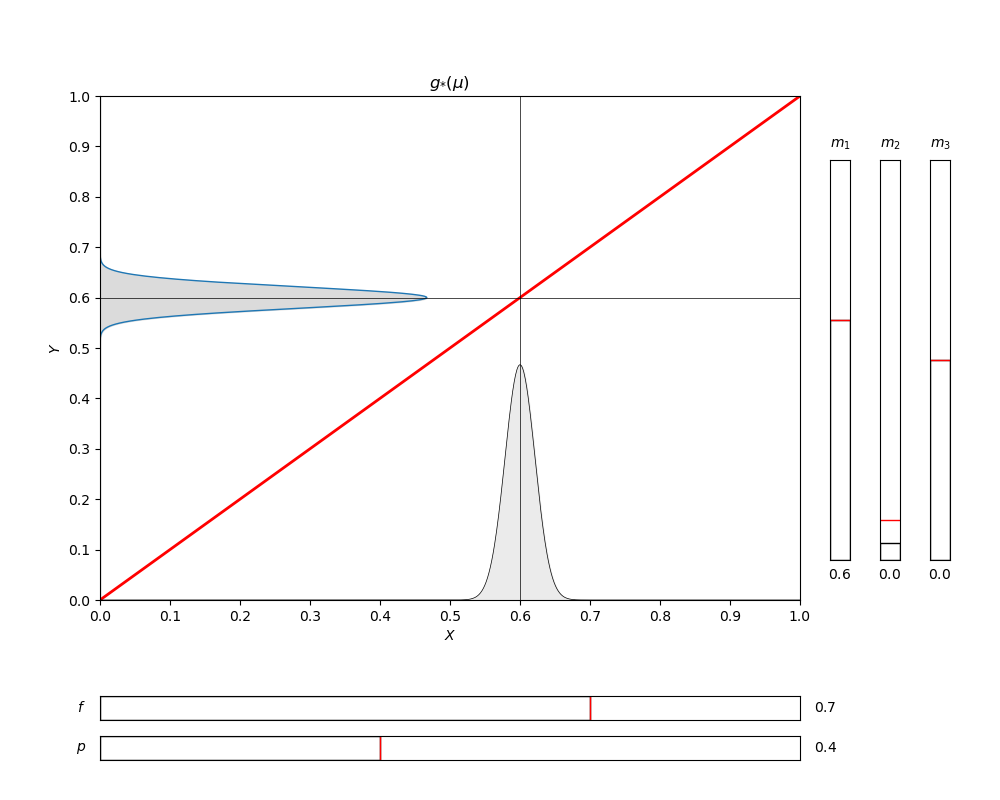

In [205]:
Fs = F(x, m10, m20, m30)


m0 = np.mean(x*Fs/trapz(Fs, x=x))
fig, ax = plt.subplots(figsize=(10,8))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False

line0, = plt.plot(ginv0(y, a10, a20), y, lw=0.5,color='k')
line, = plt.plot(x, g(x, a10, a20), lw=2,color='r')

dist0, = plt.plot(x, Fs/trapz(Fs,x=x)/A, '-k', lw=0.5)
poly0 = plt.fill_between(x, Fs/trapz(Fs, x=x)/A, color=lgrey)

dist, = plt.plot(Fs/trapz(Fs, x=x)/A, x, lw=1,color='C0')
poly = plt.fill_between(Fs/trapz(Fs, x=x)/A, x, color=mgrey)

point0,= plt.plot([m0,m0], [0, 1], 'k-',lw=0.5)
point,= plt.plot([0,1], [m0, m0], 'k-',lw=0.5)
plt.xlim([0,1])
plt.ylim([0,1])
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_xticks(np.linspace(0,1,11))
ax.set_yticks(np.linspace(0,1,11))
plt.title('$g_{*}(\mu)$');


In [206]:
plt.subplots_adjust(left=0.1,right=0.8, bottom=0.25)

In [207]:
axa2 = plt.axes([0.1, 0.1, 0.7, 0.03])
a2 = Slider(
    ax=axa2,
    facecolor='w',
    label='$f$',
    valmin=0,
    valmax=1,
    valinit=a20,
    edgecolor='k'
)

In [208]:
axa1 = plt.axes([0.1, 0.05, 0.7, 0.03])
a1 = Slider(
    ax=axa1,
    label='$p$',
    facecolor='w',
    valmin=0,
    valmax=1,
    valinit=a10,
    edgecolor='k',
)

In [209]:
axm1 = plt.axes([0.83, 0.3, 0.02, 0.5])
axm1.set_facecolor('w')
m1 = Slider(
    ax=axm1,
    label='$m_1$',
    facecolor='w',
    valmin=0,
    valmax=1,
    valinit=m10,
    valfmt='$%0.1f$',
    orientation='vertical',
    edgecolor='k'
)

In [210]:
axm2 = plt.axes([0.88, 0.3, 0.02, 0.5])
axm2.set_facecolor('w')
m2 = Slider(
    ax=axm2,
    label='$m_2$',
    facecolor='w',
    valmin=0,
    valmax=0.5,
    valinit=m20,
    valfmt='$%0.1f$',
    orientation='vertical',
    edgecolor='k'
)

In [211]:
axm3 = plt.axes([0.93, 0.3, 0.02, 0.5])
axm3.set_facecolor('w')
m3 = Slider(
    ax=axm3,
    label='$m_3$',
    facecolor='w',
    valmin=-10,
    valmax=10,
    valinit=m30,
    valfmt='$%0.1f$',
    orientation='vertical',
    edgecolor='k'
)

In [212]:
def update(val):
    F0 = F(x, m1.val, m2.val, m3.val)
    Fs = L(F, a1.val, a2.val)(y, m1.val, m2.val, m3.val)
    mu = np.trapz(y*Fs/trapz(Fs,x=y),x=y)
    mu0 = np.trapz(x*F0/trapz(F0,x=x),x=x)
    line0.set_xdata(ginv0(y, a1.val, a2.val))
    line.set_ydata(g(x, a1.val, a2.val))
    dist0.set_ydata(F0/trapz(F0, x=x)/A)
    dist.set_xdata(Fs/trapz(Fs, x=y)/A)
    point.set_ydata([mu,mu])
    point0.set_xdata([mu0,mu0])
    poly.set_verts([np.array([Fs/trapz(Fs, x=y)/A,y]).T])
    poly0.set_verts([np.array([x,F0/trapz(F0, x=x)/A]).T])
    fig.canvas.draw_idle()


In [213]:
a1.on_changed(update)
a2.on_changed(update)
m1.on_changed(update)
m2.on_changed(update)
m3.on_changed(update);